### PCA : Proteins

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import plotly.plotly as py
import plotly.graph_objs as go
import plotly.tools as tls
from sklearn.decomposition import PCA
from scipy.stats import norm
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from scipy.cluster.hierarchy import dendrogram, linkage

In [23]:
sns.set(font_scale=2.8)

### Data

In [24]:
data = pd.read_csv('../../result/caseolap.csv')
data = data.set_index('protein')
ndf = data.iloc[:,10:]
print(len(ndf))
ndf.head()

728


,MS,Parkin,ALS,AD,Epil,Schiz,FA,HSP,WD
protein,,,,,,,,,
Q96DA6,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.005083,0.0
Q96IX5,0.0,0.000000,0.0,0.003432,0.000000,0.0,0.0,0.000000,0.0
Q92947,0.0,0.000000,0.0,0.007768,0.040287,0.0,0.0,0.000000,0.0
Q9P2J9,0.0,0.003371,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
Q9H4I9,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.005083,0.0


In [25]:
nonzero_dict = {}
for col in ndf.columns:
    nonzero = 0
    for i in range(0,len(ndf)):
        if(ndf[col][i] > 0):
            nonzero += 1
    nonzero_dict[col] = nonzero
print(nonzero_dict)

{'MS': 281, 'Parkin': 364, 'ALS': 244, 'AD': 433, 'Epil': 371, 'Schiz': 327, 'FA': 116, 'HSP': 78, 'WD': 79}


In [26]:
def feature_norm(df):
    dff = df.copy(deep =True)
    fchr =  ["MS", "Parkin", "ALS", "AD", "Epil", "Schiz", "FA", "HSP", "WD"]
    for t in fchr:
        dff[t] = (df[t]-df[t].min())/(df[t].max()-df[t].min())
    return dff
ndfn = feature_norm(ndf)
ndfn.head()

,MS,Parkin,ALS,AD,Epil,Schiz,FA,HSP,WD
protein,,,,,,,,,
Q96DA6,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.02701,0.0
Q96IX5,0.0,0.000000,0.0,0.031130,0.000000,0.0,0.0,0.00000,0.0
Q92947,0.0,0.000000,0.0,0.070468,0.232145,0.0,0.0,0.00000,0.0
Q9P2J9,0.0,0.013302,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.0
Q9H4I9,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.02701,0.0


### Add colors

In [27]:
tdata = ndf.copy(deep =True)

### PCA : Weights

In [28]:
def pca_results(good_data, pca,fname):
	#clc  =['navy','green','firebrick','mediumslateblue','darkgoldenrod', 'deepskyblue',"red","blue"]

	# Dimension indexing
	dimensions = dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]

	# PCA components
	components = pd.DataFrame(np.round(pca.components_, 4), columns = good_data.keys())
	components.index = dimensions

	# PCA explained variance
	ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
	variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
	variance_ratios.index = dimensions

	# Create a bar plot visualization
	fig, ax = plt.subplots(figsize = (22,10))

	# Plot the feature weights as a function of the components
	components.plot(ax = ax, kind = 'bar' );
	ax.set_ylabel("Feature Weights",fontsize =20)
	ax.set_xticklabels(dimensions, rotation=0, fontsize = 20)


	# Display the explained variance ratios
	for i, ev in enumerate(pca.explained_variance_ratio_):
		ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n %.4f"%(ev),fontsize =10)

	# Return a concatenated DataFrame
	plt.legend(fontsize =15)
	plt.savefig(fname)
	return pd.concat([variance_ratios, components], axis = 1)

In [29]:
wt_data = ndf.copy(deep =True)

In [30]:
wt_data.head()

,MS,Parkin,ALS,AD,Epil,Schiz,FA,HSP,WD
protein,,,,,,,,,
Q96DA6,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.005083,0.0
Q96IX5,0.0,0.000000,0.0,0.003432,0.000000,0.0,0.0,0.000000,0.0
Q92947,0.0,0.000000,0.0,0.007768,0.040287,0.0,0.0,0.000000,0.0
Q9P2J9,0.0,0.003371,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
Q9H4I9,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.005083,0.0


,Explained Variance,MS,Parkin,ALS,AD,Epil,Schiz,FA,HSP,WD
Dimension 1,0.4357,0.3106,0.5465,0.2803,0.4971,0.3481,0.3713,0.0718,0.0319,0.1182
Dimension 2,0.1369,-0.2349,0.7863,-0.0803,-0.1882,-0.4961,-0.1442,-0.1142,-0.0576,-0.0375
Dimension 3,0.1070,-0.0212,0.0187,0.1531,0.0310,-0.1521,-0.2256,0.9470,-0.0152,0.0613
Dimension 4,0.0798,-0.1413,0.0338,-0.4750,-0.2798,0.0442,0.7543,0.2743,-0.1252,-0.1146
Dimension 5,0.0711,0.0048,0.2794,-0.3564,-0.2897,0.7198,-0.4264,0.0799,-0.0085,-0.0676
Dimension 6,0.0640,0.3150,0.0422,-0.1206,-0.1812,-0.1201,0.0497,0.0420,0.9114,-0.0485
Dimension 7,0.0512,-0.4648,0.0284,0.6517,-0.4615,0.2550,0.1890,-0.0190,0.1834,0.1034
Dimension 8,0.0431,0.7131,0.0246,0.2220,-0.5546,-0.0983,0.0377,-0.0204,-0.3376,0.0925
Dimension 9,0.0112,-0.0646,-0.0172,-0.2244,-0.0300,-0.0204,0.0016,-0.0289,0.0377,0.9704


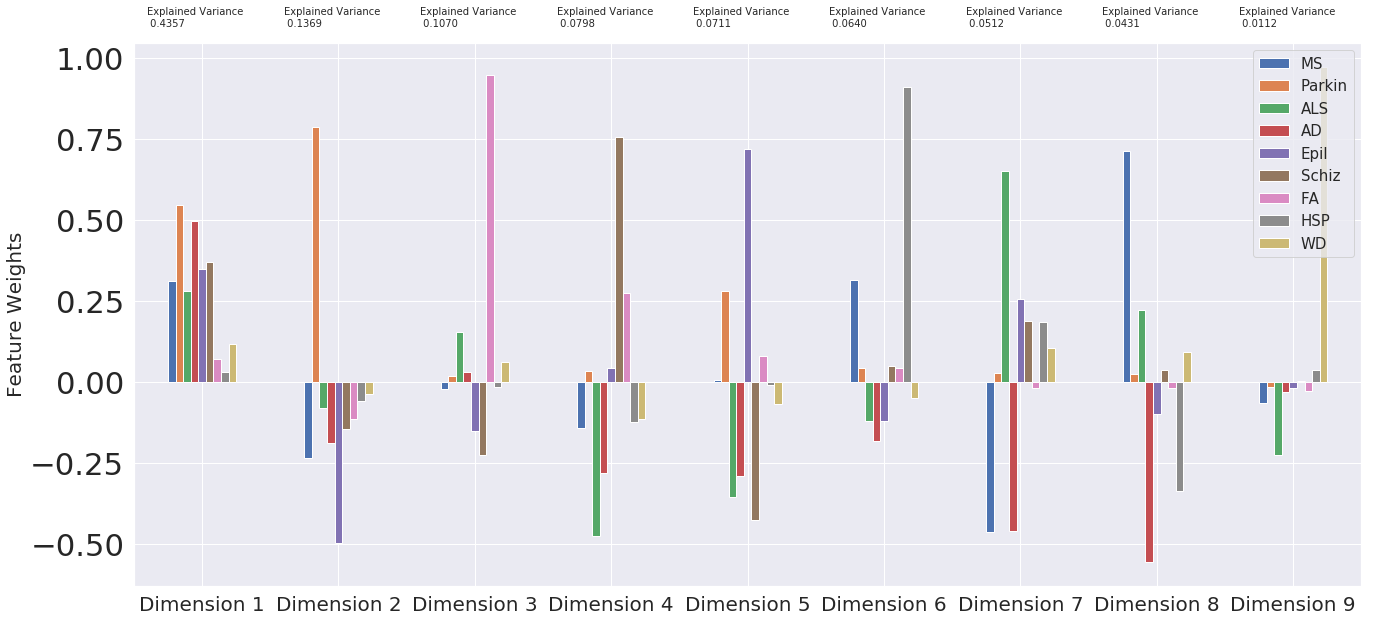

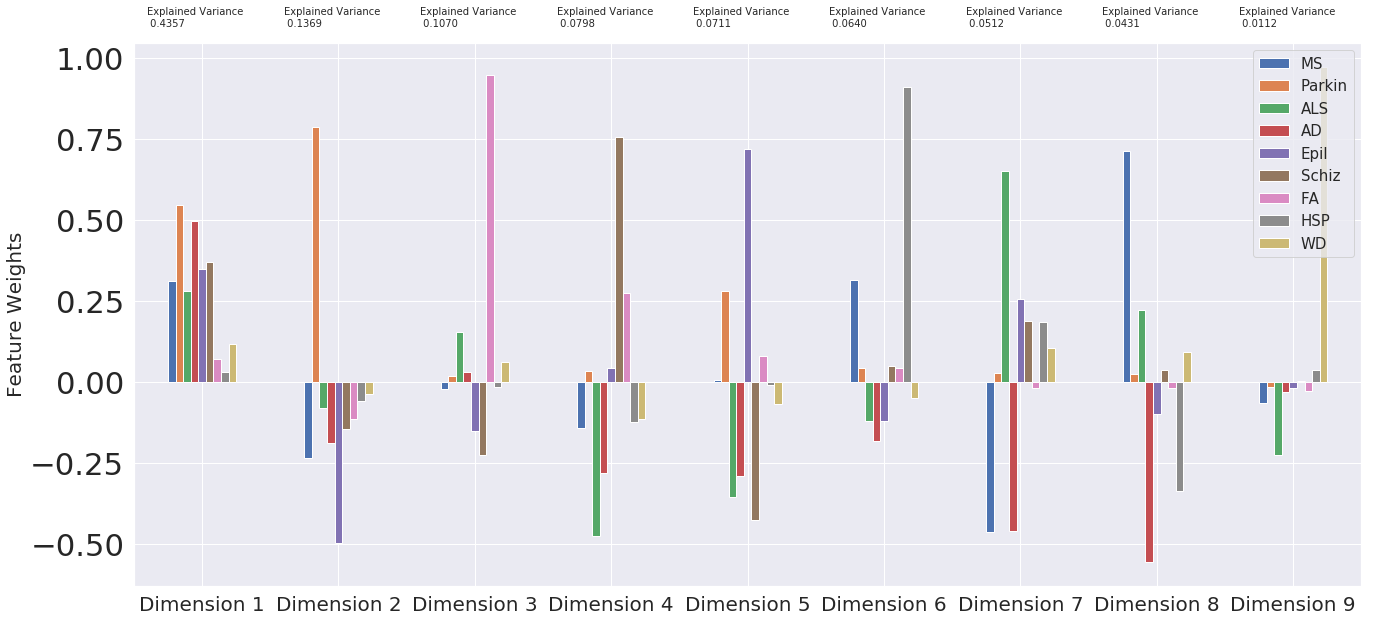

In [31]:
from sklearn.decomposition import PCA

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA()
pca.fit(wt_data)


# Generate PCA results plot
pca_results(wt_data, pca, fname = 'Data/pca-mito-secondary-weights.pdf')
pca_results(wt_data, pca, fname = 'Data/pca-mito-secondary-weights.png')

In [32]:
pca_results

<function __main__.pca_results>

In [33]:
pca.components_

array([[ 0.31064884,  0.54653436,  0.28033749,  0.49705101,  0.34805996,
         0.371302  ,  0.07181693,  0.03187285,  0.11817029],
       [-0.23487304,  0.78629125, -0.0803111 , -0.18822015, -0.49611277,
        -0.1442455 , -0.11423675, -0.05757846, -0.037471  ],
       [-0.02124145,  0.01874175,  0.1530542 ,  0.03098331, -0.1520833 ,
        -0.22564801,  0.94698435, -0.01520564,  0.06127855],
       [-0.14126404,  0.03379267, -0.47496582, -0.27977512,  0.04416621,
         0.75433493,  0.27432151, -0.12523105, -0.11458152],
       [ 0.0048059 ,  0.27940525, -0.3564323 , -0.28967998,  0.71981763,
        -0.42636723,  0.07990545, -0.00852366, -0.06758077],
       [ 0.31496015,  0.04222523, -0.12057018, -0.1812252 , -0.12012832,
         0.04966802,  0.04196129,  0.91138643, -0.0485149 ],
       [-0.46482138,  0.02837187,  0.65169016, -0.46154233,  0.25496406,
         0.18896927, -0.01898456,  0.18344369,  0.10337637],
       [ 0.71307117,  0.02455044,  0.22201958, -0.55461786, -0

----------

### PCA: Biplot

In [34]:
clrs = []
for row,col in tdata.T.iteritems():
    val = np.array(col)
    mx = max(val)
    for item in val:
        if  mx == col[0]:
            grp =  'navy'
        elif mx == col[1]:
            grp =  'orange'
        elif mx == col[2]:
            grp = 'green'
        elif mx == col[3]:
            grp = 'red'
        elif mx == col[4]:
            grp = 'purple'
        elif mx == col[5]:
            grp = 'brown'
        elif mx == col[6]:
            grp = "pink"
        elif mx == col[7]:
            grp = "grey"
        elif mx == col[8]:
            grp =  'orange'

    clrs.append(grp)

In [35]:
pdata = ndf.copy(deep = True)
ppdata = ndf.copy(deep = True)

In [36]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca.fit(pdata)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(ppdata)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

In [37]:
def biplot(good_data, reduced_data, pca,fname,clrs):
   

    fig, ax = plt.subplots(figsize = (25,15))
    clc  =['navy','orange','green','red','purple', 'brown',"pink","grey",'navy']
    
    # scatterplot of the reduced data    
    ax.scatter(x=reduced_data.loc[:, 'Dimension 1'], y=reduced_data.loc[:, 'Dimension 2'], 
        facecolors = clrs, edgecolors= clrs, s=50, alpha=0.5)
    
    # Label the points
    # REMOVE COMMENT TO ADD PROTEIN ID LABELS TO POINTS IN PCA
    #for i in range(0,len(reduced_data)):
    #    ax.annotate(wt_data.index.values[i], (reduced_data.loc[:, 'Dimension 1'][i],reduced_data.loc[:, 'Dimension 2'][i]), xytext=(10,10), fontsize = 14, textcoords='offset points')

    
    feature_vectors = pca.components_.T

    
    # we use scaling factors to make the arrows easier to see
    asize, tpos = 0.5, 0.5,
    

    # projections of the original features
    for i, v in enumerate(feature_vectors):
        
        ax.arrow(0, 0, v[0]*asize, v[1]*asize, 
                  head_width=0.005, head_length=0.005, linewidth=2, color= clc[i])
        
        ax.text(v[0]*tpos+ 0.018, v[1]*tpos-0.028, good_data.columns[i], color='black', 
                 ha='center', va='center', fontsize=20)
        
    plt.axis([-0.1, 0.4, -0.3, 0.6])
    ax.set_xlabel("PC 1", fontsize=50)
    ax.set_ylabel("PC 2", fontsize=50)
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.savefig(fname)
    return ax

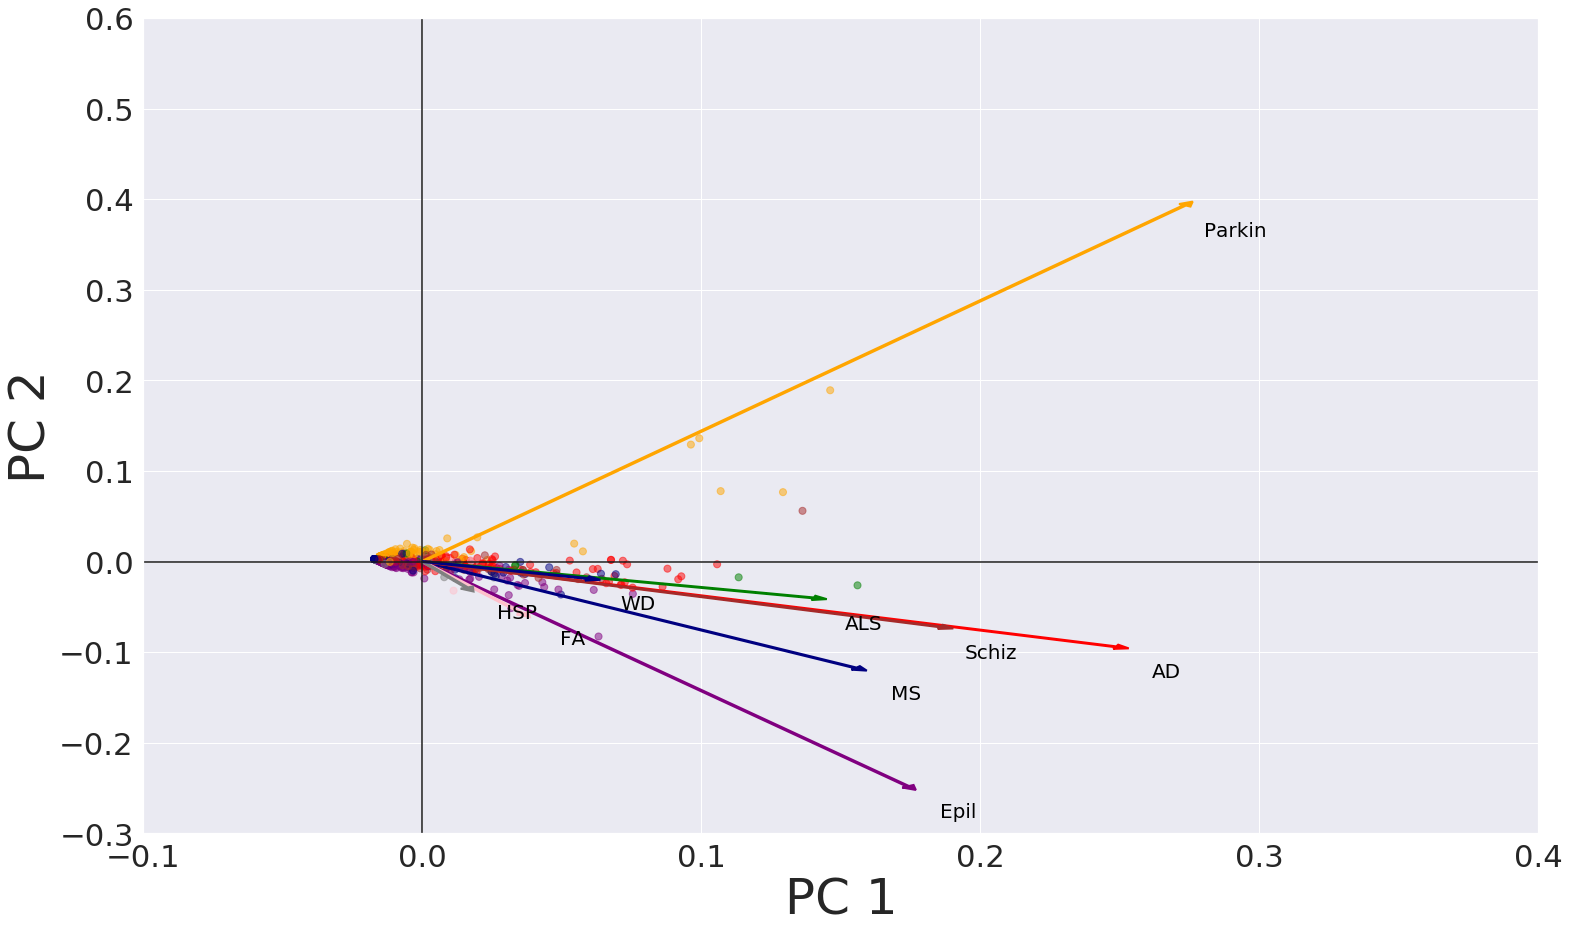

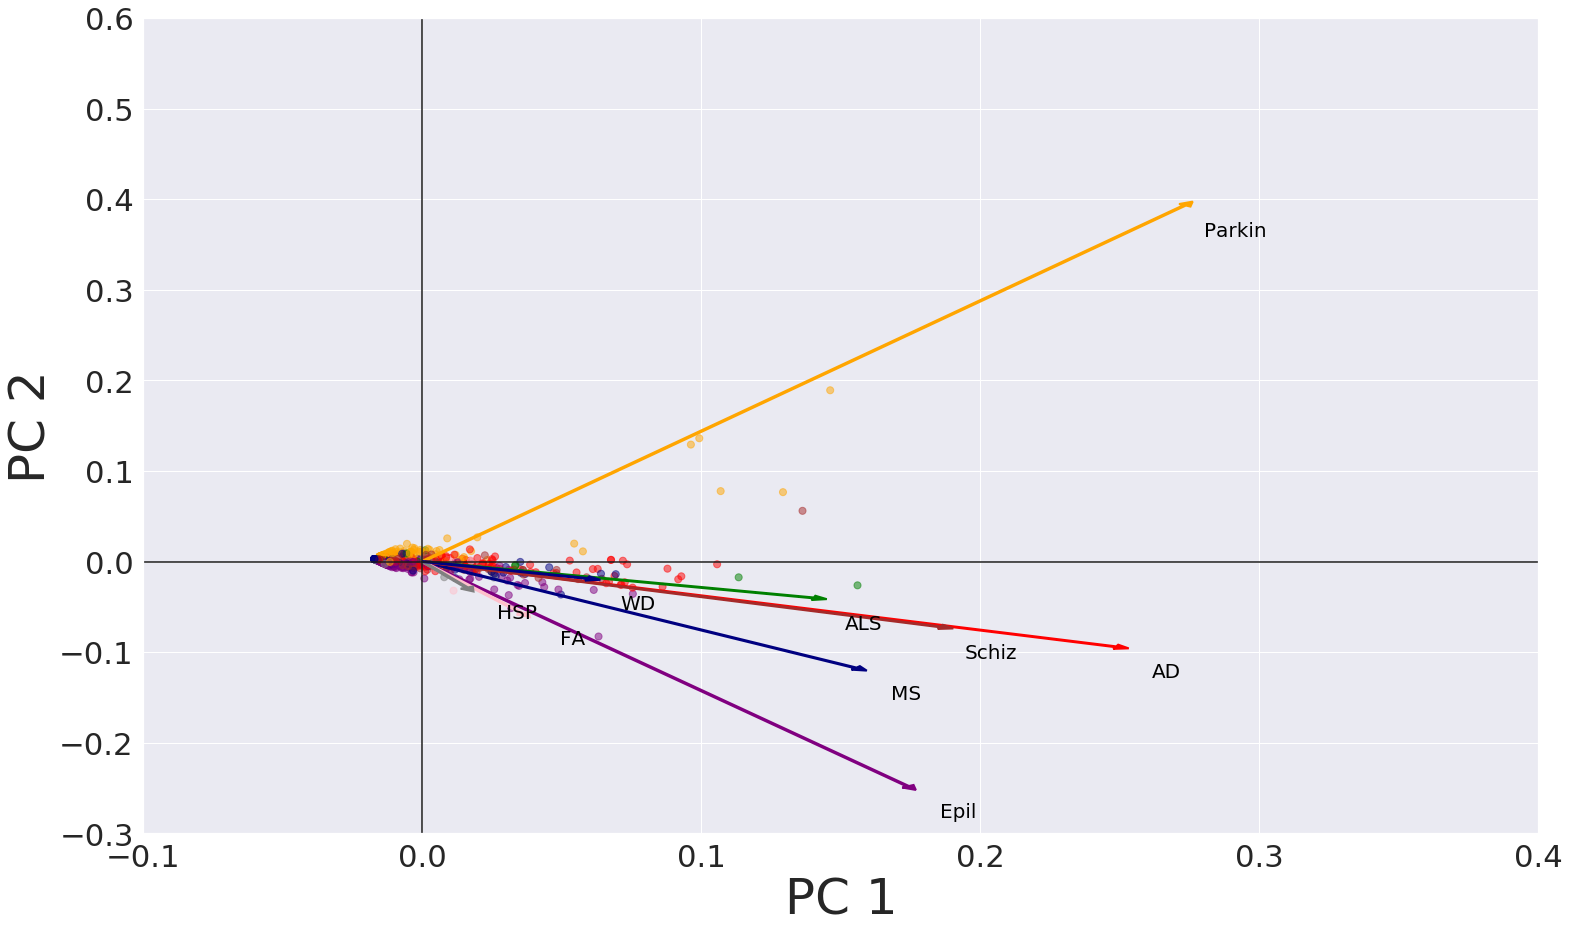

In [38]:
newdata = ndf.copy(deep =True)
# Create a biplot
biplot(newdata, reduced_data, pca,'Data/protein-secondary-biplot.pdf',clrs);
biplot(newdata, reduced_data, pca,'Data/protein-secondary-biplot.png',clrs);